In [1]:
# import dependencies
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read CSV
Youtube_Data = pd.read_csv('US_youtube_trending_data.csv')

# Convert CSV to Data Frame
Youtube_Data = pd.DataFrame(Youtube_Data)

# preview Data Frame
Youtube_Data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
# Dropping unecessary columns
Youtube_Data = Youtube_Data.drop(columns=['tags','comment_count','thumbnail_link','comments_disabled','ratings_disabled','description'])

In [4]:
# Renaming columns
Youtube_Data = Youtube_Data.rename(columns={'likes':'Likes','dislikes':'Dislikes',
                                            'channelTitle':'Channel Title','channelTitle':'Channel Title',
                                           'video_id':'Video ID','channelId':'Channel ID'})

In [5]:
Youtube_Data.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,1514614,156908,5855
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,2381688,146739,2794
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,2038853,353787,2628
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,496771,23251,1856
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,1123889,45802,964


In [6]:
# add new column that would contain latest view_count for the particular video.
#since number of views keep on increasing everyday , we will be using only single observation against a video id.
Youtube_Data['count_max_view'] = Youtube_Data.groupby(['Video ID'])['view_count'].transform(max)

In [7]:
# Renaming Data Frame 
Youtube_Unique_Video_Id = Youtube_Data

In [8]:
#changing published date , trending_date to datetime datatype.
Youtube_Unique_Video_Id.publishedAt= pd.to_datetime(Youtube_Unique_Video_Id.publishedAt)
Youtube_Unique_Video_Id.trending_date= pd.to_datetime(Youtube_Unique_Video_Id.trending_date)

In [9]:
#Adding column for year and month to the dataframe
Youtube_Unique_Video_Id['Year']=Youtube_Unique_Video_Id['publishedAt'].dt.year
Youtube_Unique_Video_Id['Month']=Youtube_Unique_Video_Id.publishedAt.dt.month

In [10]:
# make a new dataframe with only single observations for each id.
Youtube_Unique_Video_Id = Youtube_Data.loc[Youtube_Data.view_count == Youtube_Data.count_max_view]
# Youtube_Unique_Video_Id.loc[Youtube_Unique_Video_Id.Year == 2021, 'title'].count()

In [11]:
# display data frame first five rows
Youtube_Unique_Video_Id.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month
172,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8
173,NYFHnIiA8gE,Cake Rescue Fixing Viral Cake Fails | How To C...,2020-08-07 09:30:04+00:00,UCsP7Bpw36J666Fct5M8u-ZA,How To Cook That,24,2020-08-12 00:00:00+00:00,938198,44088,565,938198,2020,8
174,czwejgoH3zs,"Son, lemme teach you something new",2020-08-06 19:47:12+00:00,UCw03U5DZGLqvv5elJvXvR0Q,Bread Boys,24,2020-08-12 00:00:00+00:00,1722152,169501,927,1722152,2020,8
175,dO6YihaqtaQ,Trump takes executive action to address econom...,2020-08-09 01:35:42+00:00,UCBi2mrWuNuyYy4gbM6fU18Q,ABC News,25,2020-08-12 00:00:00+00:00,1090847,10922,2517,1090847,2020,8
176,sSjtGqRXQ9Y,JUDAS AND THE BLACK MESSIAH - Official Trailer,2020-08-06 23:01:42+00:00,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros. Pictures,24,2020-08-12 00:00:00+00:00,971704,23311,1987,971704,2020,8


In [12]:
# gives us various count of video in each channel category
Youtube_Unique_Video_Id.groupby("categoryId").size().reset_index(name="View Count") \
    .sort_values("View Count", ascending=False).head(20)

,categoryId,View Count
9,24,5229
6,20,5016
2,10,4260
4,17,3094
7,22,2382
8,23,1410
0,1,1033
10,25,1021
13,28,828
11,26,759


In [13]:
#Getting category for the category file
#we need id and title from this file which are under items tag and snippet contain title
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    category.append([cat["id"],cat["snippet"]["title"]])

In [14]:
df_category = pd.DataFrame(category,columns=['categoryId','category']) 
df_category.head(20)

,categoryId,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [15]:
df_category.categoryId=df_category.categoryId.astype('int64')
#merge YT Data Frame and df_category to get category names
df_merge = Youtube_Unique_Video_Id.merge(df_category, on = 'categoryId', how = 'inner')
df_merge.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,category
0,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,Howto & Style
1,8r1D-vNUWsg,☁️ 🍞 CLOUD BREAD,2020-08-09 00:00:04+00:00,UCzqbfYjQmf9nLQPMxVgPhiA,emmymadeinjapan,26,2020-08-14 00:00:00+00:00,993107,41182,650,993107,2020,8,Howto & Style
2,XlOLx3fyf10,TESTING TIKTOK ART TUTORIALS,2020-08-08 20:00:03+00:00,UCD4XIm3ZFhT72WjqhIXMN9w,LavenderTowne,26,2020-08-14 00:00:00+00:00,407183,42644,347,407183,2020,8,Howto & Style
3,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,2020-08-15 00:00:00+00:00,4782509,207021,3637,4782509,2020,8,Howto & Style
4,YwJyis4yOEA,ANSWERING YOUR ASSUMPTIONS ABOUT US 😭,2020-08-09 13:46:28+00:00,UC21yq4sq8uxTcfgIxxyE9VQ,Carli Bybel,26,2020-08-15 00:00:00+00:00,350066,20393,379,350066,2020,8,Howto & Style


In [16]:
df_merge['MonYear']=df_merge['Year'].astype(str)+ df_merge['Month'].astype(str)
df_merge.head()

,Video ID,title,publishedAt,Channel ID,Channel Title,categoryId,trending_date,view_count,Likes,Dislikes,count_max_view,Year,Month,category,MonYear
0,cAtazIk1IYw,How To Make a Curried Egg Sandwich,2020-08-07 18:30:06+00:00,UCR4s1DE9J4DHzZYXMltSMAg,HowToBasic,26,2020-08-12 00:00:00+00:00,1238677,104736,3736,1238677,2020,8,Howto & Style,20208
1,8r1D-vNUWsg,☁️ 🍞 CLOUD BREAD,2020-08-09 00:00:04+00:00,UCzqbfYjQmf9nLQPMxVgPhiA,emmymadeinjapan,26,2020-08-14 00:00:00+00:00,993107,41182,650,993107,2020,8,Howto & Style,20208
2,XlOLx3fyf10,TESTING TIKTOK ART TUTORIALS,2020-08-08 20:00:03+00:00,UCD4XIm3ZFhT72WjqhIXMN9w,LavenderTowne,26,2020-08-14 00:00:00+00:00,407183,42644,347,407183,2020,8,Howto & Style,20208
3,KnE6u4hFx14,PAINTING OUR FACES ON BRENT'S NEW HOUSE! (REVE...,2020-08-08 20:45:05+00:00,UCPpATKqmMV-CNRNWYaDUwiA,Alexa Rivera,26,2020-08-15 00:00:00+00:00,4782509,207021,3637,4782509,2020,8,Howto & Style,20208
4,YwJyis4yOEA,ANSWERING YOUR ASSUMPTIONS ABOUT US 😭,2020-08-09 13:46:28+00:00,UC21yq4sq8uxTcfgIxxyE9VQ,Carli Bybel,26,2020-08-15 00:00:00+00:00,350066,20393,379,350066,2020,8,Howto & Style,20208


In [17]:
#Create copy of df merge
df_merge_copy = df_merge
df_merge.fillna(0)

#Combine Month and Year Column
#YT_Data_COVID_Copy['MonYear']=YT_Data_COVID_Copy['Year'].astype(str)+ YT_Data_COVID_Copy['Month'].astype(str)


augTT = df_merge_copy[df_merge_copy["MonYear"]=="20208"]
sepTT = df_merge_copy[df_merge_copy["MonYear"]=="20209"]
octTT = df_merge_copy[df_merge_copy["MonYear"]=="202010"]
novTT = df_merge_copy[df_merge_copy["MonYear"]=="202011"]
decTT = df_merge_copy[df_merge_copy["MonYear"]=="202012"]
janTO = df_merge_copy[df_merge_copy["MonYear"]=="20211"]
febTO = df_merge_copy[df_merge_copy["MonYear"]=="20212"]
marTO = df_merge_copy[df_merge_copy["MonYear"]=="20213"]
aprTO = df_merge_copy[df_merge_copy["MonYear"]=="20214"]
mayTO = df_merge_copy[df_merge_copy["MonYear"]=="20215"]
junTO = df_merge_copy[df_merge_copy["MonYear"]=="20216"]
julTO = df_merge_copy[df_merge_copy["MonYear"]=="20217"]
augTO = df_merge_copy[df_merge_copy["MonYear"]=="20218"]
sepTO = df_merge_copy[df_merge_copy["MonYear"]=="20219"]
octTO = df_merge_copy[df_merge_copy["MonYear"]=="202110"]
novTO = df_merge_copy[df_merge_copy["MonYear"]=="202111"]
decTO = df_merge_copy[df_merge_copy["MonYear"]=="202112"]
janTTW = df_merge_copy[df_merge_copy["MonYear"]=="20221"]
febTTW = df_merge_copy[df_merge_copy["MonYear"]=="20222"]
marTTW = df_merge_copy[df_merge_copy["MonYear"]=="20223"]
aprTTW = df_merge_copy[df_merge_copy["MonYear"]=="20224"]
mayTTW = df_merge_copy[df_merge_copy["MonYear"]=="20225"]
junTTW = df_merge_copy[df_merge_copy["MonYear"]=="20226"]


# Group by Channel and get sum of max view count
augTT_ct_VCount = augTT.groupby(["Channel Title"]).sum()["count_max_view"]
sepTT_ct_VCount = sepTT.groupby(["Channel Title"]).sum()["count_max_view"]
octTT_ct_VCount = octTT.groupby(["Channel Title"]).sum()["count_max_view"]
novTT_ct_VCount = novTT.groupby(["Channel Title"]).sum()["count_max_view"]
decTT_ct_VCount = decTT.groupby(["Channel Title"]).sum()["count_max_view"]
janTO_ct_VCount = janTO.groupby(["Channel Title"]).sum()["count_max_view"]
febTO_ct_VCount = febTO.groupby(["Channel Title"]).sum()["count_max_view"]
marTO_ct_VCount = marTO.groupby(["Channel Title"]).sum()["count_max_view"]
aprTO_ct_VCount = aprTO.groupby(["Channel Title"]).sum()["count_max_view"]
mayTO_ct_VCount = mayTO.groupby(["Channel Title"]).sum()["count_max_view"]
junTO_ct_VCount = junTO.groupby(["Channel Title"]).sum()["count_max_view"]
julTO_ct_VCount = julTO.groupby(["Channel Title"]).sum()["count_max_view"]
augTO_ct_VCount = augTO.groupby(["Channel Title"]).sum()["count_max_view"]
sepTO_ct_VCount = sepTO.groupby(["Channel Title"]).sum()["count_max_view"]
octTO_ct_VCount = octTO.groupby(["Channel Title"]).sum()["count_max_view"]
novTO_ct_VCount = novTO.groupby(["Channel Title"]).sum()["count_max_view"]
decTO_ct_VCount = decTO.groupby(["Channel Title"]).sum()["count_max_view"]
janTTW_ct_VCount = janTTW.groupby(["Channel Title"]).sum()["count_max_view"]
febTTW_ct_VCount = febTTW.groupby(["Channel Title"]).sum()["count_max_view"]
marTTW_ct_VCount = marTTW.groupby(["Channel Title"]).sum()["count_max_view"]
aprTTW_ct_VCount = aprTTW.groupby(["Channel Title"]).sum()["count_max_view"]
mayTTW_ct_VCount = mayTTW.groupby(["Channel Title"]).sum()["count_max_view"]
junTTW_ct_VCount = junTTW.groupby(["Channel Title"]).sum()["count_max_view"]


# Combine Channel Title series into single DataFrame
channelViewCount = pd.DataFrame({
    "Aug 20" : augTT_ct_VCount,
    "Sep 20" : sepTT_ct_VCount,
    "Oct 20" : octTT_ct_VCount,
    "Nov 20" : novTT_ct_VCount,
    "Dec 20" : decTT_ct_VCount,
    "Jan 21" : janTO_ct_VCount,
    "Feb 21" : febTO_ct_VCount,
    "Mar 21" : marTO_ct_VCount,
    "Apr 21" : aprTO_ct_VCount,
    "May 21" : mayTO_ct_VCount,
    "Jun 21" : junTO_ct_VCount,
    "Jul 21" : julTO_ct_VCount,
    "Aug 21" : augTO_ct_VCount,
    "Sep 21" : sepTO_ct_VCount,
    "Oct 21" : octTO_ct_VCount,
    "Nov 21" : novTO_ct_VCount,
    "Dec 21" : decTO_ct_VCount,
    "Jan 22" : janTTW_ct_VCount,
    "Feb 22" : febTTW_ct_VCount,
    "Mar 22" : marTTW_ct_VCount,
    "Apr 22" : aprTTW_ct_VCount,
    "May 22" : mayTTW_ct_VCount,
    "Jun 22" : junTTW_ct_VCount,
})



#channelViewCount.fillna(0)

#Group by Category
augTTVideoCount = augTT.groupby(["category"]).sum()["count_max_view"]
sepTTVideoCount = sepTT.groupby(["category"]).sum()["count_max_view"]
octTTVideoCount = octTT.groupby(["category"]).sum()["count_max_view"]
novTTVideoCount = novTT.groupby(["category"]).sum()["count_max_view"]
decTTVideoCount = decTT.groupby(["category"]).sum()["count_max_view"]
janTOVideoCount = janTO.groupby(["category"]).sum()["count_max_view"]
febTOVideoCount = febTO.groupby(["category"]).sum()["count_max_view"]
marTOVideoCount = marTO.groupby(["category"]).sum()["count_max_view"]
aprTOVideoCount = aprTO.groupby(["category"]).sum()["count_max_view"]
mayTOVideoCount = mayTO.groupby(["category"]).sum()["count_max_view"]
junTOVideoCount = junTO.groupby(["category"]).sum()["count_max_view"]
julTOVideoCount = julTO.groupby(["category"]).sum()["count_max_view"]
augTOVideoCount = augTO.groupby(["category"]).sum()["count_max_view"]
sepTOVideoCount = sepTO.groupby(["category"]).sum()["count_max_view"]
octTOVideoCount = octTO.groupby(["category"]).sum()["count_max_view"]
novTOVideoCount = novTO.groupby(["category"]).sum()["count_max_view"]
decTOVideoCount = decTO.groupby(["category"]).sum()["count_max_view"]
janTTWVideoCount = janTTW.groupby(["category"]).sum()["count_max_view"]
febTTWVideoCount = febTTW.groupby(["category"]).sum()["count_max_view"]
marTTWVideoCount = marTTW.groupby(["category"]).sum()["count_max_view"]
aprTTWVideoCount = aprTTW.groupby(["category"]).sum()["count_max_view"]
mayTTWVideoCount = mayTTW.groupby(["category"]).sum()["count_max_view"]
junTTWVideoCount = junTTW.groupby(["category"]).sum()["count_max_view"]


# Combine Channel Title series into single DataFrame
categoryViewCount = pd.DataFrame({
    "Aug 20" : augTTVideoCount,
    "Sep 20" : sepTTVideoCount,
    "Oct 20" : octTTVideoCount,
    "Nov 20" : novTTVideoCount,
    "Dec 20" : decTTVideoCount,
    "Jan 21" : janTOVideoCount,
    "Feb 21" : febTOVideoCount,
    "Mar 21" : marTOVideoCount,
    "Apr 21" : aprTOVideoCount,
    "May 21" : mayTOVideoCount,
    "Jun 21" : junTOVideoCount,
    "Jul 21" : julTOVideoCount,
    "Aug 21" : augTOVideoCount,
    "Sep 21" : sepTOVideoCount,
    "Oct 21" : octTOVideoCount,
    "Nov 21" : novTOVideoCount,
    "Dec 21" : decTOVideoCount,
    "Jan 22" : janTTWVideoCount,
    "Feb 22" : febTTWVideoCount,
    "Mar 22" : marTTWVideoCount,
    "Apr 22" : aprTTWVideoCount,
    "May 22" : mayTTWVideoCount,
    "Jun 22" : junTTWVideoCount,})

categoryViewCount.fillna(0)


,Aug 20,Sep 20,Oct 20,Nov 20,Dec 20,Jan 21,Feb 21,Mar 21,Apr 21,May 21,...,Sep 21,Oct 21,Nov 21,Dec 21,Jan 22,Feb 22,Mar 22,Apr 22,May 22,Jun 22
category,,,,,,,,,,,,,,,,,,,,,
Autos & Vehicles,1.650100e+07,33016241,30254745,2.202777e+07,36965536.0,16350167.0,62206592.0,1.253393e+07,17000926,17001521,...,21030257,18559867,16457253.0,15481107.0,21587506.0,30548998.0,10059650.0,16826010,18741391.0,15205423.0
Comedy,8.216078e+07,114889089,136883595,8.792999e+07,63436209.0,67755170.0,78234487.0,6.708876e+07,82235369,88971519,...,84738849,332817039,270635532.0,289521015.0,129199777.0,126137534.0,106043776.0,76427501,84734129.0,70444598.0
Education,2.667809e+07,40693996,31221073,1.762869e+07,50934776.0,15807552.0,21805509.0,3.300958e+07,28378488,52276663,...,39278967,81086026,66874687.0,119983892.0,110464496.0,69378974.0,213263367.0,42545680,46834639.0,45257264.0
Entertainment,5.772924e+08,483099097,651445838,4.225642e+08,580608185.0,490698211.0,562235282.0,5.709394e+08,917467944,1205284357,...,643451875,636772071,768877245.0,948420961.0,685657310.0,615684832.0,608944801.0,632183175,617305128.0,741363726.0
Film & Animation,5.986668e+07,97306862,101321800,7.375736e+07,98239345.0,85189391.0,97299650.0,9.812182e+07,147129598,118342662,...,101538226,168211400,135524931.0,276578813.0,87834357.0,134244309.0,125355884.0,89869110,95817476.0,110795143.0
Gaming,1.873733e+08,343892643,468990182,2.857296e+08,386774199.0,331350407.0,309354909.0,4.816284e+08,607182551,555646711,...,523528765,627979343,396752250.0,491814931.0,513910154.0,372580938.0,364337885.0,380106731,369355611.0,479616084.0
Howto & Style,5.495068e+07,76879314,56080504,9.202254e+07,60848081.0,46816268.0,118714736.0,3.852125e+07,42434167,112078195,...,44842398,42564764,53250132.0,37261515.0,105362485.0,40045591.0,35365001.0,36756663,23456858.0,30476044.0
Music,1.439346e+09,1192184306,1417795656,1.310793e+09,881898213.0,880488536.0,786883660.0,1.122882e+09,993799494,1279068168,...,1067878337,969155151,605769357.0,621409756.0,446326752.0,450915146.0,774448375.0,794922297,757712323.0,898657785.0
News & Politics,7.374715e+07,44336067,153930956,9.218491e+07,30351949.0,100595177.0,28119130.0,9.952676e+07,78038067,89560529,...,32249316,22832791,34295891.0,21954150.0,36758800.0,109644658.0,178643736.0,40398304,71949998.0,46908630.0


In [18]:
categoryGroupDF = df_merge_copy.groupby(["category"]).sum('count_max_view').sort_values('count_max_view', ascending=False)
categoryGroupDF

,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
category,,,,,,,
Music,42600,22072050453,1281316871,19659401,22072050453,8609377,29052
Entertainment,125496,16384118661,794328954,10771438,16384118661,10568401,34043
Gaming,100320,10472288963,526624310,7143155,10472288963,10138681,31886
Sports,52598,5615401074,128768129,2739862,5615401074,6253126,20645
People & Blogs,52404,5348878177,295201740,5939540,5348878177,4814394,15357
Comedy,32430,2817994727,201197079,2199804,2817994727,2849700,9731
Film & Animation,1033,2655891906,108293001,1296526,2655891906,2087825,6821
Science & Technology,23184,2405494484,95114762,1820504,2405494484,1673324,5812
News & Politics,25525,1560309156,21991893,1721492,1560309156,2063555,6096


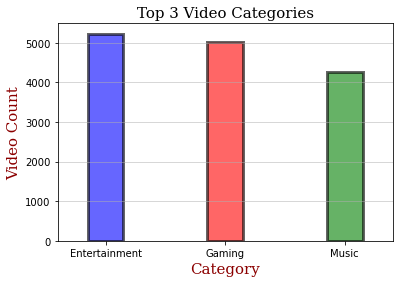

In [19]:
# Which three video categories had the highest volume of videos posted? 
#variable to hold the colors for bars
colors = ['blue','red','green']
df_merge_copy.groupby(df_merge_copy['category']).size().sort_values(ascending=False).head(3).plot(kind='bar',color= colors,alpha = .60, width = .30, edgecolor = "black", linewidth = 3)

#variable for the font settings
font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':15}

plt.title('Top 3 Video Categories',fontdict = font2)
plt.xlabel('Category',fontdict = font1)
plt.ylabel('Video Count',fontdict = font1)
plt.xticks(rotation='horizontal')
plt.grid(axis='y', linewidth = 0.5)
plt.savefig("images/Top_3_Categories.png")
plt.show()


#plt.savefig("images/Top_3_Categories_Overall_bar.png")

In [20]:
#musicDF = df_merge_copy.loc(["category"]) == 'Music'
musicDF = df_merge_copy.loc[df_merge_copy['category'] == 'Music']
musicCH = musicDF.groupby(["Channel Title"]).sum('count_max_view').sort_values('count_max_view', ascending=False).head(10)
musicCH

,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
Channel Title,,,,,,,
SMTOWN,500,1157079206,58750883,737410,1157079206,101050,330
HYBE LABELS,380,1096104657,103846051,538641,1096104657,76813,243
BLACKPINK,390,1032567547,92539409,1919702,1032567547,78806,277
JYP Entertainment,470,952388820,48227931,609057,952388820,94990,322
BANGTANTV,520,643449122,102832352,459926,643449122,105091,395
Big Hit Labels,160,599584464,57411672,1261833,599584464,32322,143
Bad Bunny,190,547232915,22873641,312338,547232915,38397,136
BillieEilishVEVO,280,292858758,21550241,451589,292858758,56584,209
Anuel AA,110,251189350,4173258,74547,251189350,22236,64


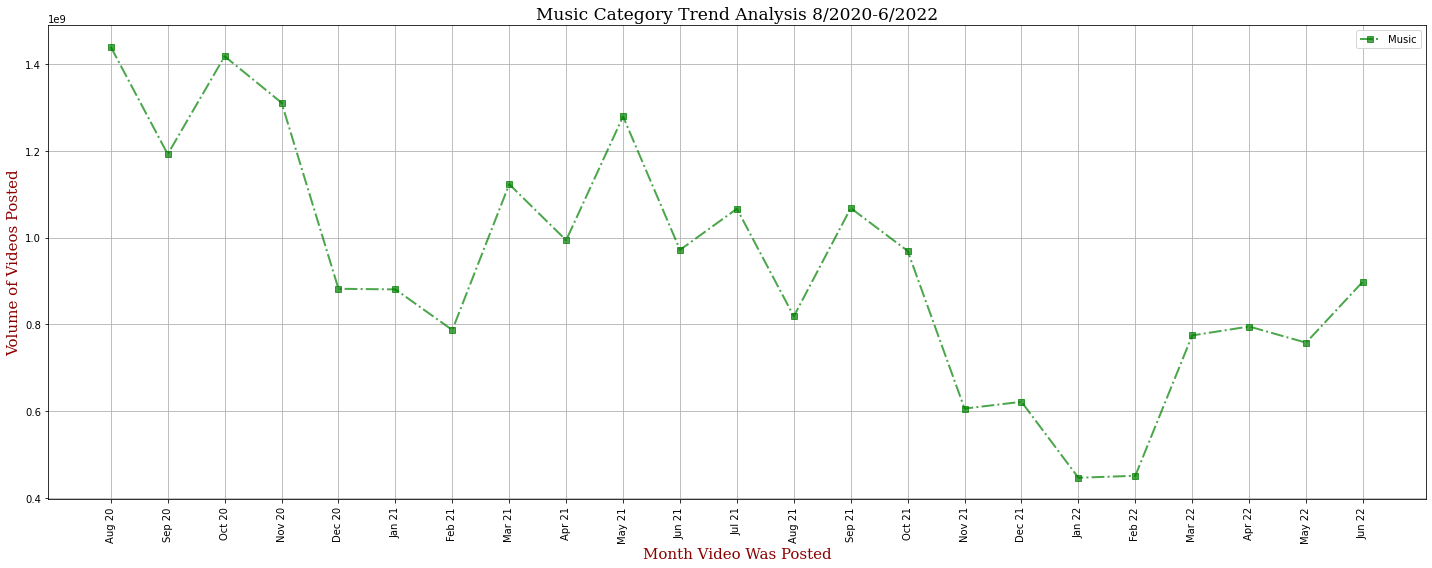

In [21]:
#Plot Music Category views over time
musicCat = categoryViewCount.loc['Music'].fillna(0)
musicCat.plot(kind='line', x=categoryViewCount.index, y=categoryViewCount.values, linestyle = "-.", marker = "s",linewidth=2, alpha = .70, color = "g", figsize=(20, 8))

font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}

plt.title("Music Category Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(musicCat))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, musicCat.index, rotation = "vertical")
plt.tight_layout()

#plt.savefig("images/Music_Category_Chart.png")

plt.legend()
plt.show()

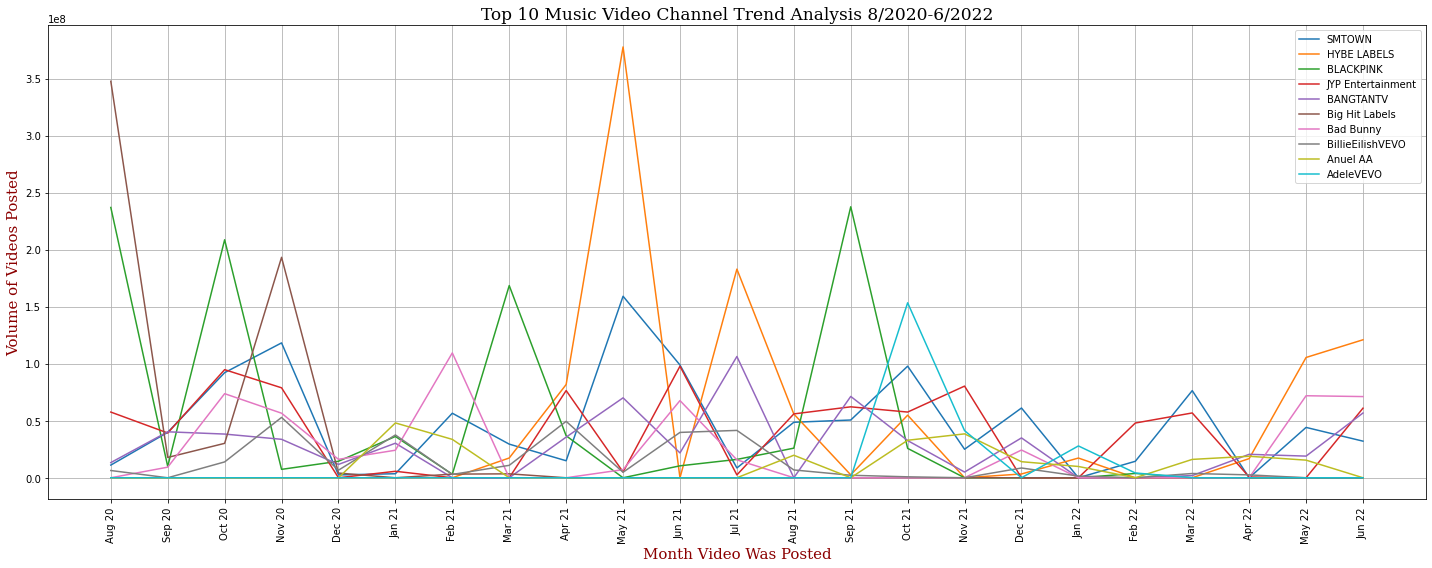

In [22]:
#Organize top 10 music channels by max view count per month
sMTOWN= channelViewCount.loc['SMTOWN'].fillna(0)
hybeLabels= channelViewCount.loc['HYBE LABELS'].fillna(0)
bLACKPINK= channelViewCount.loc['BLACKPINK'].fillna(0)
jypEntertainment= channelViewCount.loc['JYP Entertainment'].fillna(0)
bangTanTV= channelViewCount.loc['BANGTANTV'].fillna(0)
bigHitLabels= channelViewCount.loc['Big Hit Labels'].fillna(0)
badBunny= channelViewCount.loc['Bad Bunny'].fillna(0)
billieElish= channelViewCount.loc['BillieEilishVEVO'].fillna(0)
anuelAA= channelViewCount.loc['Anuel AA'].fillna(0)
adele= channelViewCount.loc['AdeleVEVO'].fillna(0)


#Plot the Results
sMTOWN.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
hybeLabels.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
bLACKPINK.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
jypEntertainment.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
bangTanTV.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
bigHitLabels.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
badBunny.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
billieElish.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
anuelAA.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
adele.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))


font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}

plt.title("Top 10 Music Video Channel Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(sMTOWN))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, sMTOWN.index, rotation = "vertical")
plt.tight_layout()
plt.legend()
#plt.savefig("images/Top10_Music_Channel_Chart.png")


plt.show()

In [23]:
#Determine top 10 entertainmant channels 
entDF = df_merge_copy.loc[df_merge_copy['category'] == 'Entertainment']
entCH = entDF.groupby(["Channel Title"]).sum('count_max_view').sort_values('count_max_view', ascending=False).head(10)
entCH

,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
Channel Title,,,,,,,
MrBeast,1176,1647968009,104398356,928195,1647968009,99016,360
SSSniperWolf,2688,597654836,18364973,241449,597654836,226346,813
Marvel Entertainment,1272,523646628,23280544,171652,523646628,107123,312
Dan Rhodes,288,445938538,15366535,761189,445938538,24254,50
Beast Reacts,1128,425379203,16627089,105195,425379203,95008,280
Sony Pictures Entertainment,648,299144549,9184476,140831,299144549,54570,206
Ryan Trahan,1344,272239623,13200218,27856,272239623,113213,361
Bizarrap,216,255966796,19845573,195846,255966796,18193,55
Universal Pictures,648,247988719,2626542,20963,247988719,54573,178


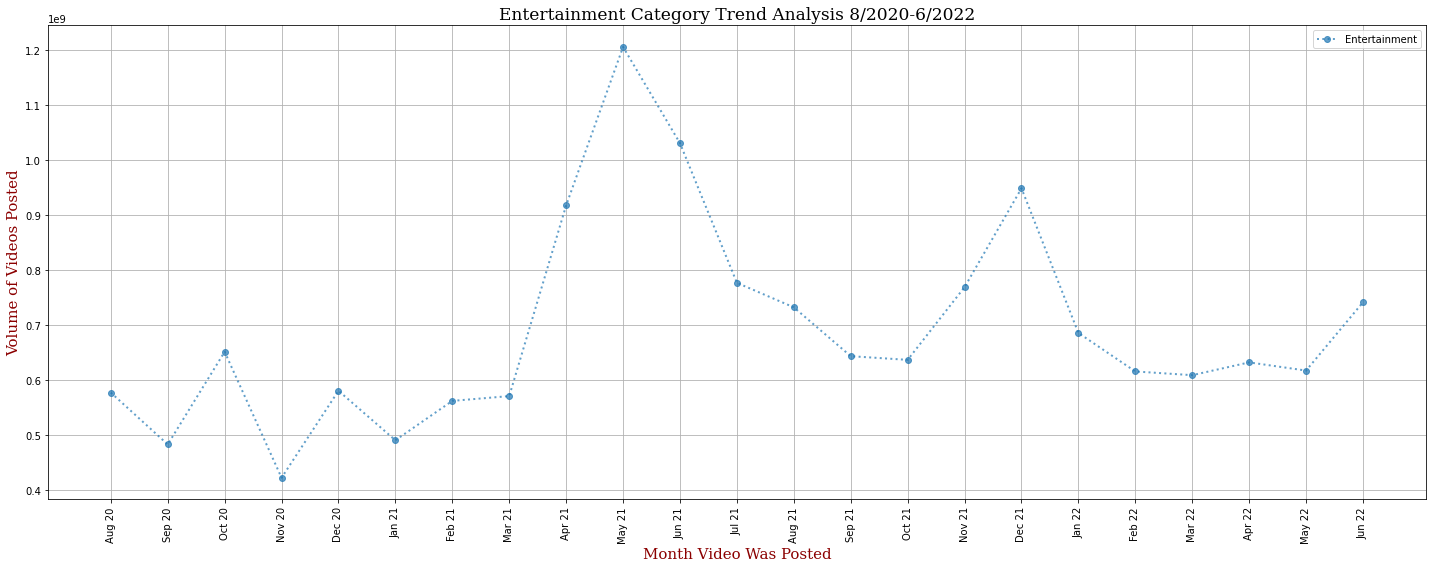

In [24]:
#Plot Entertainment Category views over time
entCat = categoryViewCount.loc['Entertainment'].fillna(0)
entCat.plot(kind='line', x=categoryViewCount.index, y=categoryViewCount.values, linestyle = ":", marker = "o",linewidth=2, alpha = .70, figsize=(20, 8))

font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}

plt.title("Entertainment Category Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(entCat))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, entCat.index, rotation = "vertical")
plt.tight_layout()
plt.legend()

#plt.savefig("images/Entertainment_Category_Chart.png")

plt.show()

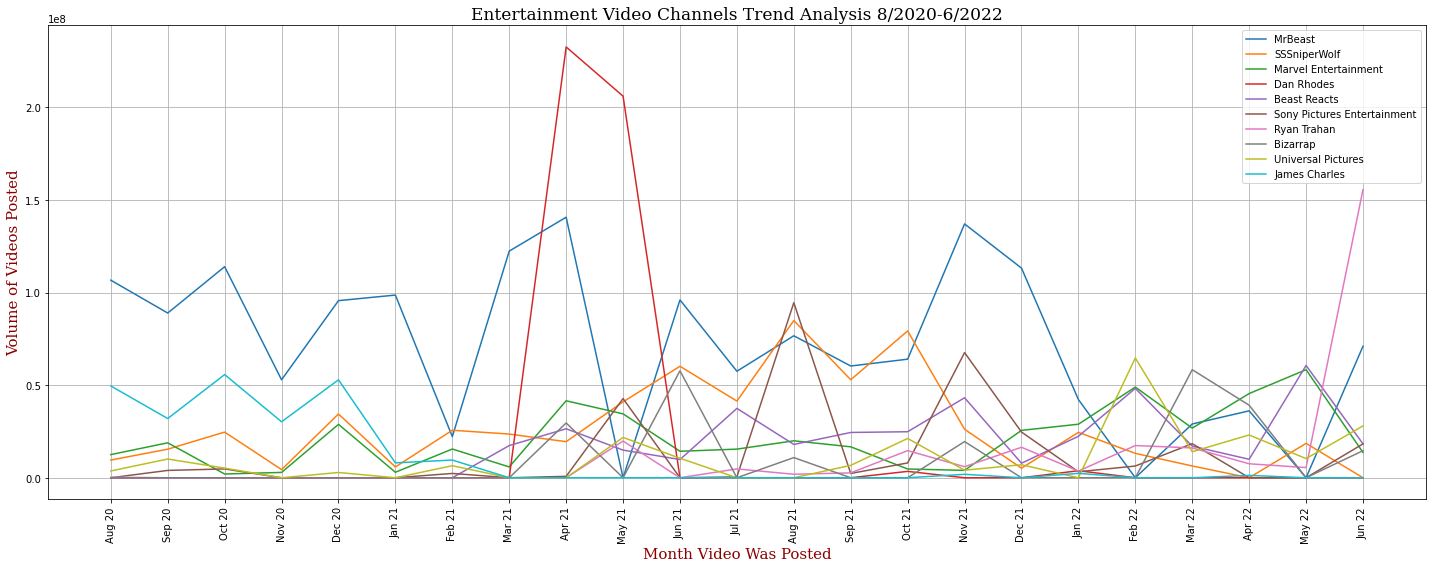

In [25]:
#Organize top 10 entertainment channels by max view count per month
mrBeast= channelViewCount.loc['MrBeast'].fillna(0)
ssSniperWolf= channelViewCount.loc['SSSniperWolf'].fillna(0)
marvelEnt= channelViewCount.loc['Marvel Entertainment'].fillna(0)
danR= channelViewCount.loc['Dan Rhodes'].fillna(0)
beastR= channelViewCount.loc['Beast Reacts'].fillna(0)
sony= channelViewCount.loc['Sony Pictures Entertainment'].fillna(0)
ryanT= channelViewCount.loc['Ryan Trahan'].fillna(0)
bizarrap= channelViewCount.loc['Bizarrap'].fillna(0)
universalPic= channelViewCount.loc['Universal Pictures'].fillna(0)
jamesC= channelViewCount.loc['James Charles'].fillna(0)

#Plot the Results
mrBeast.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
ssSniperWolf.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
marvelEnt.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
danR.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
beastR.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
sony.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
ryanT.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
bizarrap.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
universalPic.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
jamesC.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))

font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}

plt.title("Entertainment Video Channels Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(mrBeast))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, mrBeast.index, rotation = "vertical")
plt.tight_layout()

plt.legend()

#plt.savefig("images/Top10_Entertainment_Category_Chart.png")


plt.show()

In [26]:
#Determine top 10 gaming channels 
gamingDF = df_merge_copy.loc[df_merge_copy['category'] == 'Gaming']
gamingCH = gamingDF.groupby(["Channel Title"]).sum('count_max_view').sort_values('count_max_view', ascending=False).head(10)
gamingCH

,categoryId,view_count,Likes,Dislikes,count_max_view,Year,Month
Channel Title,,,,,,,
MrBeast Gaming,1360,806200607,38197129,543036,806200607,137408,498
SSundee,1900,429421122,25815065,293980,429421122,192008,696
Brawl Stars,480,341774303,15065693,169655,341774303,48505,174
Clash of Clans,840,284898897,4842693,90353,284898897,84888,300
Dream,260,239713825,19351037,334300,239713825,26271,98
LazarBeam,860,223493145,10886935,111565,223493145,86906,283
The Game Theorists,1120,189940385,11876376,149011,189940385,113183,347
League of Legends,700,187622343,9123314,211632,187622343,70736,236
Fortnite,1160,185137993,6531209,230333,185137993,117217,391


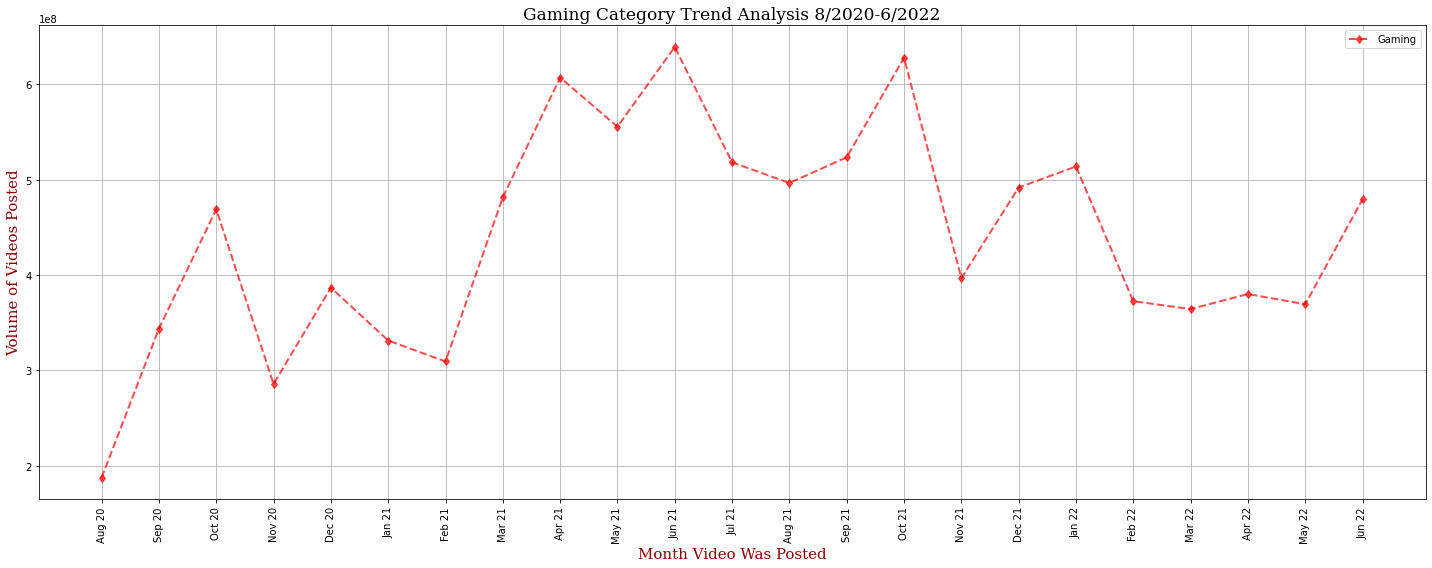

In [27]:
#Plot Gaming Category views over time
gameCat = categoryViewCount.loc['Gaming'].fillna(0)
gameCat.plot(kind='line', x=categoryViewCount.index, y=categoryViewCount.values, linestyle = "--", marker = "d",linewidth=2, alpha = .70, color ="r", figsize=(20, 8))

font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}


plt.title("Gaming Category Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(gameCat))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, gameCat.index, rotation = "vertical")
plt.tight_layout()

plt.legend()

#plt.savefig("images/Gaming_Category_Chart.png")


plt.show()

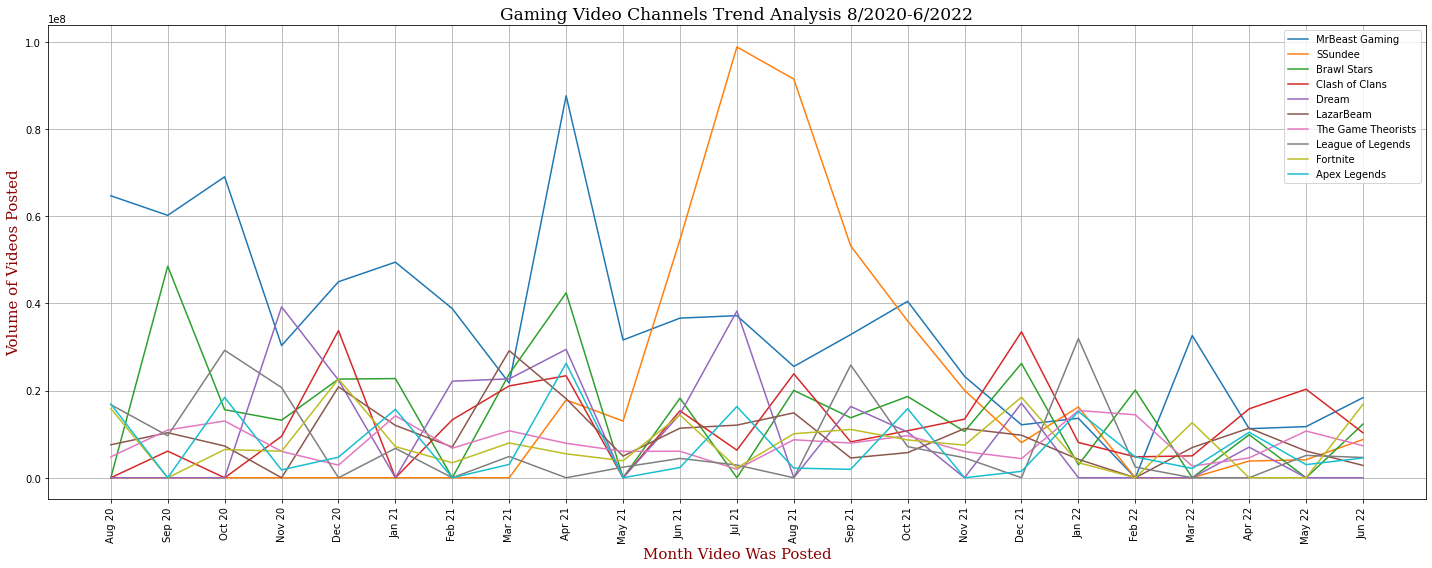

In [28]:
#Organize top 10 gaming channels by max view count per month
mrBeastG= channelViewCount.loc['MrBeast Gaming'].fillna(0)
sSundee= channelViewCount.loc['SSundee'].fillna(0)
brawlS= channelViewCount.loc['Brawl Stars'].fillna(0)
clashC= channelViewCount.loc['Clash of Clans'].fillna(0)
dream= channelViewCount.loc['Dream'].fillna(0)
lazerB= channelViewCount.loc['LazarBeam'].fillna(0)
gameTheorists= channelViewCount.loc['The Game Theorists'].fillna(0)
leagueLegends= channelViewCount.loc['League of Legends'].fillna(0)
fortnite= channelViewCount.loc['Fortnite'].fillna(0)
apex= channelViewCount.loc['Apex Legends'].fillna(0)

#Plot the Results
mrBeastG.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
sSundee.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
brawlS.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
clashC.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
dream.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
lazerB.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
gameTheorists.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
leagueLegends.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
fortnite.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))
apex.plot(kind='line', x=channelViewCount.index, y=channelViewCount.values, figsize=(20, 8))

font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}


plt.title("Gaming Video Channels Trend Analysis 8/2020-6/2022", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(mrBeastG))
tick_locations = []


#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, mrBeastG.index, rotation = "vertical")
plt.tight_layout()

plt.legend()

#plt.savefig("images/Top_10_Gaming_Category_Chart.png")


plt.show()

In [30]:
# Create data series of Video Counts by Category using conditionals

augTT = df_merge[df_merge["MonYear"]=="20208"]
sepTT = df_merge[df_merge["MonYear"]=="20209"]
octTT = df_merge[df_merge["MonYear"]=="202010"]
novTT = df_merge[df_merge["MonYear"]=="202011"]
decTT = df_merge[df_merge["MonYear"]=="202012"]
janTO = df_merge[df_merge["MonYear"]=="20211"]
febTO = df_merge[df_merge["MonYear"]=="20212"]
marTO = df_merge[df_merge["MonYear"]=="20213"]
aprTO = df_merge[df_merge["MonYear"]=="20214"]
mayTO = df_merge[df_merge["MonYear"]=="20215"]
junTO = df_merge[df_merge["MonYear"]=="20216"]
julTO = df_merge[df_merge["MonYear"]=="20217"]
augTO = df_merge[df_merge["MonYear"]=="20218"]


#Group by Category
augTTVideoCount = augTT.groupby(["category"]).count()["Video ID"]
sepTTVideoCount = sepTT.groupby(["category"]).count()["Video ID"]
octTTVideoCount = octTT.groupby(["category"]).count()["Video ID"]
novTTVideoCount = novTT.groupby(["category"]).count()["Video ID"]
decTTVideoCount = decTT.groupby(["category"]).count()["Video ID"]
janTOVideoCount = janTO.groupby(["category"]).count()["Video ID"]
febTOVideoCount = febTO.groupby(["category"]).count()["Video ID"]
marTOVideoCount = marTO.groupby(["category"]).count()["Video ID"]
aprTOVideoCount = aprTO.groupby(["category"]).count()["Video ID"]
mayTOVideoCount = mayTO.groupby(["category"]).count()["Video ID"]
junTOVideoCount = junTO.groupby(["category"]).count()["Video ID"]
julTOVideoCount = julTO.groupby(["category"]).count()["Video ID"]
augTOVideoCount = augTO.groupby(["category"]).count()["Video ID"]

# Combine series into single DataFrame
videoCountbyMon = pd.DataFrame({
    "Aug 20" : augTTVideoCount,
    "Sep 20" : sepTTVideoCount,
    "Oct 20" : octTTVideoCount,
    "Nov 20" : novTTVideoCount,
    "Dec 20" : decTTVideoCount,
    "Jan 21" : janTOVideoCount,
    "Feb 21" : febTOVideoCount,
    "Mar 21" : marTOVideoCount,
    "Apr 21" : aprTOVideoCount,
    "May 21" : mayTOVideoCount,
    "Jun 21" : junTOVideoCount,
    "Jul 21" : julTOVideoCount,

   
})

#YT_Data_COVID.to_csv("YT_Data_COVID.csv")
videoCountbyMon

,Aug 20,Sep 20,Oct 20,Nov 20,Dec 20,Jan 21,Feb 21,Mar 21,Apr 21,May 21,Jun 21,Jul 21
category,,,,,,,,,,,,
Autos & Vehicles,18.0,24,20,19.0,24.0,15.0,23.0,11.0,9,18,25,19
Comedy,60.0,62,80,59.0,43.0,50.0,40.0,53.0,39,36,55,51
Education,25.0,28,21,16.0,24.0,13.0,18.0,20.0,15,29,17,24
Entertainment,197.0,193,239,175.0,198.0,160.0,211.0,202.0,218,230,224,213
Film & Animation,37.0,43,41,33.0,43.0,34.0,38.0,38.0,46,28,45,34
Gaming,75.0,112,112,86.0,105.0,99.0,155.0,182.0,197,170,277,239
Howto & Style,39.0,54,43,53.0,43.0,29.0,31.0,32.0,21,19,27,29
Music,214.0,272,284,207.0,204.0,142.0,160.0,179.0,161,185,148,185
News & Politics,64.0,44,42,44.0,24.0,65.0,25.0,47.0,42,44,22,43


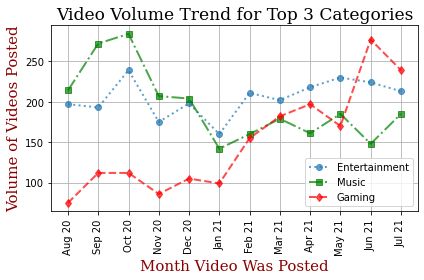

In [32]:
#Top 3 Categories Video volume trend

musicCat = videoCountbyMon.loc['Music']
gameCat= videoCountbyMon.loc['Gaming']
entCat= videoCountbyMon.loc['Entertainment']

entCat.plot(kind='line', x=entCat.index, y=entCat.values, linestyle = ":", marker = "o",linewidth=2, alpha = .70)
musicCat.plot(kind='line', x=musicCat.index, y=musicCat.values,linestyle = "-.", marker = "s",linewidth=2, alpha = .70, color = "g")
gameCat.plot(kind='line', x=gameCat.index, y=gameCat.values,linestyle = "--", marker = "d",linewidth=2, alpha = .70, color ="r")
plt.legend()


font1 = {'family':'serif','color':'darkred','size':15}
font2 = {'family':'serif','color':'black','size':17}

plt.title("Video Volume Trend for Top 3 Categories", fontdict = font2)
plt.xlabel("Month Video Was Posted",fontdict = font1)
plt.ylabel("Volume of Videos Posted",fontdict = font1)
plt.grid()

x_axis = np.arange(len(entCat))
tick_locations = []

#assign tick locations
for x in x_axis:
    tick_locations.append(x)
tick_locations

plt.xticks(tick_locations, entCat.index, rotation = "vertical")
plt.tight_layout()

#plt.savefig("images/Top_3_Categories_VolumeTrend.png")